In [2]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
from active_fluid import active_fluid
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.patches as patches
from tqdm import trange
%matplotlib notebook

In [ ]:
AF1 = active_fluid(N_ptcl=300000)
AF1.u = 10
# AF1.Dt = 1
AF1.alpha = 1
AF1.lamb = 3*AF1.u
AF1.l_passive = 5
AF1.L = 30
AF1.R = 1
AF1.Rb = 1
AF1.mu_T = 0.1
AF1.mu_R = np.array([0.08*AF1.L**2])
AF1.RA = np.array([AF1.R])
AF1.set_zero()


# Visualization
fig, ax1= plt.subplots(1,1,figsize=(8,8))


ax1.set_xlim(-AF1.L/2,AF1.L/2)
ax1.set_ylim(-AF1.L/2,AF1.L/2)

thetas = np.linspace(-np.pi/2,np.pi/2,AF1.N_body).reshape(1,-1)+AF1.Theta.reshape(-1,1)
RA = np.array([0,AF1.R]).reshape(-1,1)
centerX = AF1.R*np.cos(thetas)-RA*np.cos(AF1.Theta.reshape(-1,1))
centerY = AF1.R*np.sin(thetas)-RA*np.sin(AF1.Theta.reshape(-1,1))

pointX = (AF1.X.reshape(-1,1)+centerX).reshape(-1)
pointY = (AF1.Y.reshape(-1,1)+centerY).reshape(-1)

bath = ax1.scatter(AF1.x, AF1.y,color='blue',alpha=0.1*2000/AF1.N_ptcl,s=100)
body = ax1.scatter(pointX,pointY,color='red',s=300*(AF1.Rb/3)**2*(40/AF1.L)**2)
hinge = ax1.scatter(AF1.X,AF1.Y, c='black',s=30*(AF1.Rb/3)**2)

for i in trange(100):
    AF1.time_evolve()
#     bath.set_offsets(np.hstack((AF1.x,AF1.y)))
#     (pointX,pointY)=AF1.config()
#     body.set_offsets(np.hstack((pointX,pointY)))
# print(np.vstack((AF1.x,AF1.y)).shape)
# print(pointX.shape)

def animate(i):
    if (i+1)%100==0:
        print(i+1)
    
    for _ in range(50):
        AF1.time_evolve()


    bath.set_offsets(np.vstack((AF1.x,AF1.y)).T)
    (pointX,pointY)=AF1.config()
    body.set_offsets(np.vstack((pointX,pointY)).T)

    return body,bath

# update(T)
anim = FuncAnimation(fig,animate,np.arange(1, 2000),interval=3, blit=True)
FFwriter = animation.FFMpegWriter(fps=120)
plt.show()
anim.save('rot20.mp4', writer = FFwriter)

model initialized


<IPython.core.display.Javascript object>

100%|██████████| 100/100 [00:11<00:00,  8.54it/s]


/var/folders/lw/029rcgcn4dzb1g0lvp1ljlv80000gp/T/ipykernel_26974/969165820.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


250000


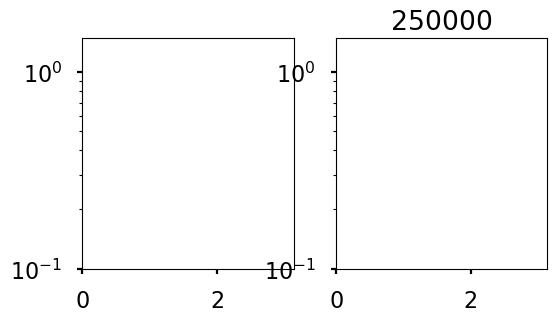

150000


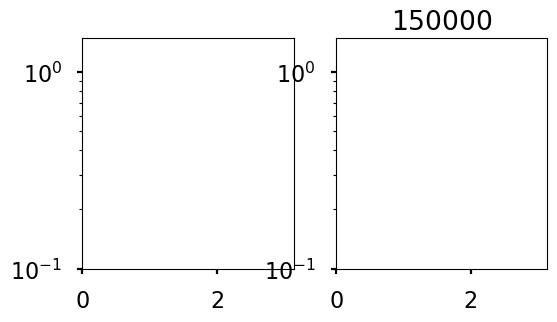

100000


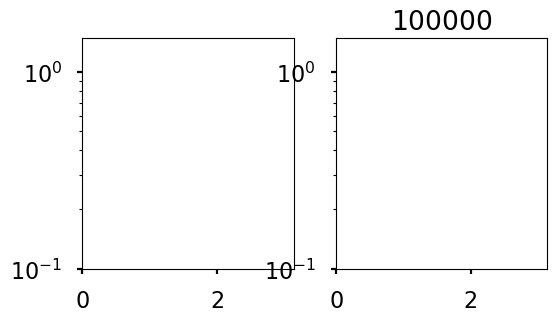

70000


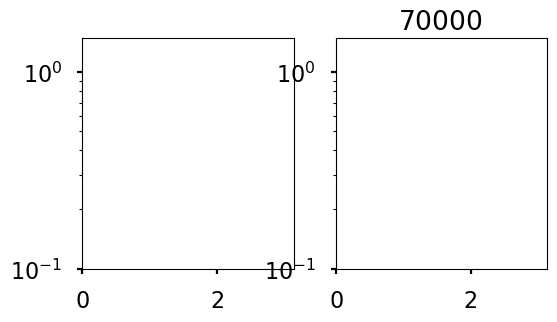

50000


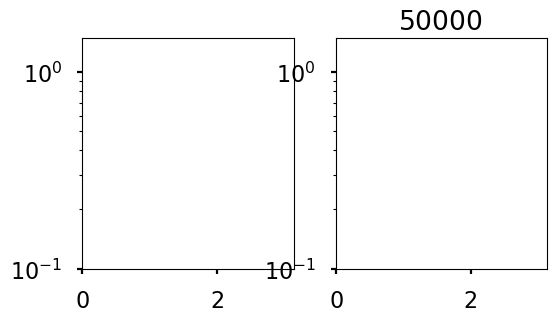

30000


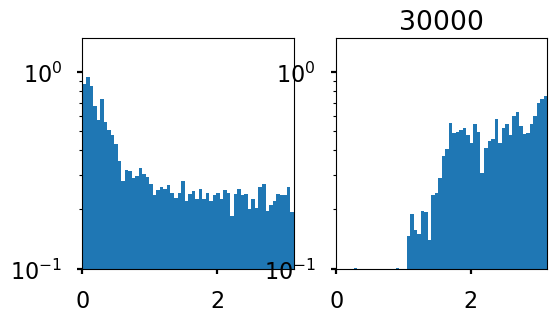

20000


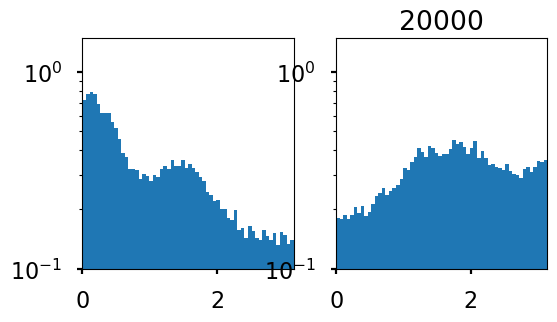

15000


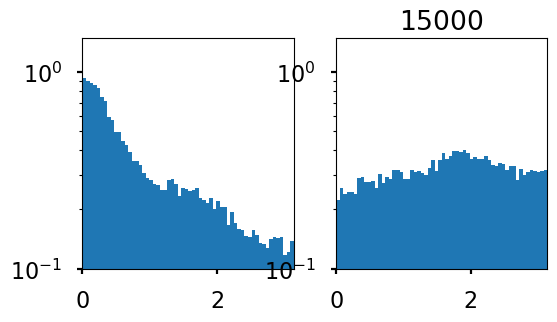

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

plt.style.use('seaborn-poster')
plt.rcParams["figure.figsize"] = (6,5)

direc = 'data/rotation/4/'

# N_list = [250000,150000,100000,70000,50000,30000,20000,16000,13000,10000,6000,4000,2000,1500]
N_list = [250000,150000,100000,70000,50000,30000,20000,15000]


for N in N_list:
    fig, (ax1,ax2)= plt.subplots(1,2,figsize=(6,3))

    print(N)
    pdfTrajp = np.zeros(0)
    pdfTrajn = np.zeros(0)
    for i in range(30):
        try:
            load = np.load(direc+str(N)+'_'+str(i)+'.npz')
            # pdfTrajp = np.hstack((pdfTrajp,np.abs(-np.pi+(load['traj'][:,0]+load['traj'][:,1])%(2*np.pi))))
            # pdfTrajn = np.hstack((pdfTrajn,np.abs(-np.pi+(load['traj'][:,0]-load['traj'][:,1])%(2*np.pi))))
            
            pdfTrajp = np.hstack((pdfTrajp,np.abs(-np.pi+(load['traj'][int(len(load['traj'])*1/3):,0]+load['traj'][int(len(load['traj'])*1/3):,1])%(2*np.pi))))
            pdfTrajn = np.hstack((pdfTrajn,np.abs(-np.pi+(load['traj'][int(len(load['traj'])*1/3):,0]-load['traj'][int(len(load['traj'])*1/3):,1])%(2*np.pi))))

            # plt.plot((load['traj'][:,0]-load['traj'][:,1])%(2*np.pi))
            # plt.plot((load['traj'][:,0]+load['traj'][:,1])%(2*np.pi))
            # plt.show()
        except:
            pass
        # print(pdfTrajp)
    ax1.hist(pdfTrajp,bins=60, label=N,alpha=1,density=True)
    ax2.hist(pdfTrajn,bins=60,label=N,alpha=1,density=True)
    # plt.plot(load['dt']*np.arange(len(load['MSD'])),load['MSD'],label=load['f'])
    ax1.set_xlim(0,np.pi)
    ax2.set_xlim(0,np.pi)
    ax1.set_ylim(0.1,1.5)
    ax2.set_ylim(0.1,1.5)
    ax1.set_yscale('log')
    ax2.set_yscale('log')

    plt.title(N)

    plt.show()


In [10]:
AF1.x

array([ 10.29756434, -12.08905592, -17.71369553, ...,   6.97507882,
        -0.4639706 ,   9.8608482 ])

In [ ]:
# make animation
AF1.animate(10000, record=True)

import matplotlib.pyplot as plt
import numpy as np
import imageio
from PIL import Image
import os
import matplotlib.image as mpimg
path = [f"./record/{i}.png" for i in range(10000)]
paths = [ Image.open(i) for i in path]
imageio.mimsave('./record.gif', paths, fps=300)